In [96]:
import pandas as pd
import matplotlib.pyplot as plt

def calcular_coeficientes_peltier(df,
                                n_voltaje= "Voltage_n1",
                                n_corriente = "Current_n1",
                                n1_temperatura= "Temperature_1_n1",
                                n2_temperatura= "Temperature_2_n1" ):
    df["Power"] = df[n_corriente] * df[n_voltaje]
    
    idx_max_power = df["Power"].idxmax()
    D = df.iloc[idx_max_power]
    R_int = 3.5
    alpha = D[n_voltaje] / abs(D[n1_temperatura] - D[n2_temperatura])
    Voc = 2 * D[n_voltaje]
    V_out = df[n_voltaje]
    I_out = df[n_corriente]
    R_l = V_out / I_out
    DM = (Voc) **2 * (R_l / ((R_l + R_int) ** 2))
    plt.plot(df[n_voltaje],DM,label="Potencia calculada con $R_{"+"int" + "}$ = "+str( round(R_int,4)))
    plt.plot(df[n_voltaje],df["Power"],label="Potencia medida")
    plt.text(0.95, 0.95, r'$\alpha$ = {:.4f}'.format(alpha), fontsize=12, ha='right', va='top', transform=plt.gca().transAxes)
    plt.text(0.95, 0.85, r'$T = 50\degree C$', fontsize=12, ha='right', va='top', transform=plt.gca().transAxes)
    plt.xlabel("Voltaje [V]")
    plt.ylabel("Potencia [W]")
    plt.title("Voltaje vs Potencia ")
    plt.grid()
    plt.legend()
    plt.show()
    return R_int, alpha


In [90]:
df= pd.read_csv("/Users/brianrodriguez/Documents/Peltier_fin/interfaz/Interfaz-Peltier/medicion_60.csv")

In [ ]:
"Voltage_n1"  "Current_n1" "Temperature_1_n1" "Temperature_2_n1"

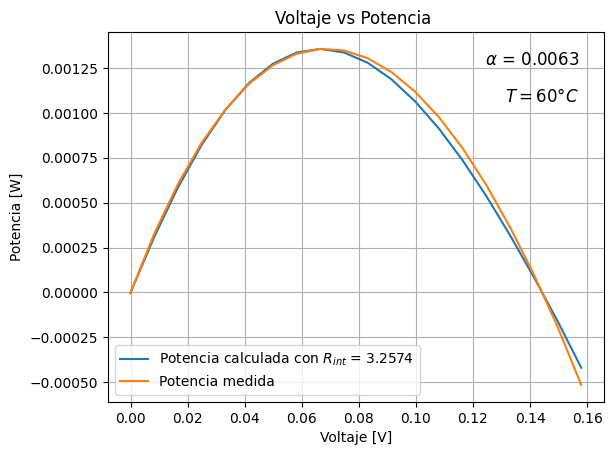

(3.257385124372013, 0.006296032121380331)

In [92]:
calcular_coeficientes_peltier(df)

In [97]:
df1= pd.read_csv("/Users/brianrodriguez/Documents/Peltier_fin/interfaz/Interfaz-Peltier/medicion_50.csv")

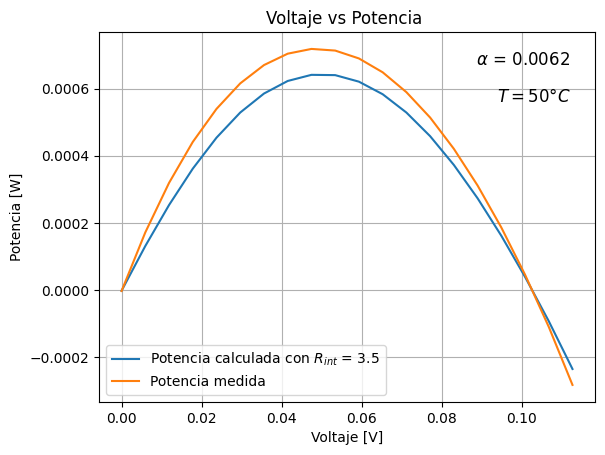

(3.5, 0.006190371042569463)

In [98]:
calcular_coeficientes_peltier(df1)